In [2]:
import torch
import math
import matplotlib.pyplot as plt
import random

dtype = torch.float
device = torch.device("cuda")


In [3]:
def perform_approximation(x, y_expected, learning_rate, number_of_iterations, training_graph_display_rate, stagnation_tolerance_rate):

  # set up the neural network that will approximate the function

  # Every x in the polynomial (x, x^2, x^3) is its own function
  # unsqueeze maps from (2000) to (2000, 1)
  # pow uses all x parameters as powers for the tensor p
  p = torch.tensor([1, 2, 3, 4, 5], device=device)
  xx = x.unsqueeze(-1).pow(p)

  # a simple linear sequential model
  # input - 3, output - 1
  # Flatten maps the output to a 1D vector
  model = torch.nn.Sequential(
      torch.nn.Linear(5, 1),
      torch.nn.Flatten(0, 1)
  ).cuda()

  # mean square error with error summation
  loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

  #SGD optimizer
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  #set up loss statistics
  t_samples = []
  loss_samples = []
  loss_gradient_samples = []
  previous_loss = 0
  current_loss = 0
  loss_delta = 0
  stagnation_counter = 0
  total_stagnation = 0
  accepted_number_of_stagnation = 500



  # the training loop
  print("Entering training:")
  for t in range(number_of_iterations):
      # forward propagation
      # y = a + b x + c x^2 + d x^3
      y_pred = model(xx)

      # calculate the error using a built-in error function
      loss = loss_fn(y_pred, y_expected)

      # determine the rate at which the losses are changing
      current_loss = loss.item()
      loss_delta = previous_loss - current_loss
      previous_loss = current_loss


      # if the rate of change of losses is below a certain level (stagnation tolerance rate), we've probably reached the local minimum
      if abs(loss_delta) < stagnation_tolerance_rate:
        stagnation_counter += 1
      else:
        total_stagnation += stagnation_counter
        stagnation_counter = 0

      if stagnation_counter > accepted_number_of_stagnation:
        print(f"Training has reached the local minimum")
        break

      # reset the gradient using the optimizer
      optimizer.zero_grad()

      # backpropagation
      # calculates the gradient with respect to all three parameters of the model
      # all parameters within the model are tensors with the property requires_grad=True
      loss.backward()

      # update the parameters using the optimizer
      optimizer.step()

      # get the parameters
      linear_layer = model[0]

      a = linear_layer.bias.item()
      b = linear_layer.weight[:, 0].item()
      c = linear_layer.weight[:, 1].item()
      d = linear_layer.weight[:, 2].item()
      e = linear_layer.weight[:, 3].item()
      f = linear_layer.weight[:, 4].item()

      # display the learning process
      if t % training_graph_display_rate == 0:

          # gather the loss samples
          t_samples.append(t)
          loss_samples.append(current_loss)
          loss_gradient_samples.append(loss_delta)
          print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

          # plot the functions
          y_graph = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5
          plt.plot(x.cpu().detach(), y_expected.cpu().detach(), '-r', label='expected function', color = "red") 
          plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='trained function', color ="blue")
          plt.title('Approximation')
          plt.xlabel('x', color='#1C2833')
          plt.ylabel('y', color='#1C2833')
          plt.legend(loc='upper left')
          plt.grid()
          plt.show()

  print(f"Training finished after {t} iterations")
  print(f"x_min: {x_min}")
  print(f"x_max: {x_max}")
  print(f"Learning rate: {learning_rate},  ")
  print(f"Stagnation tolerance rate: {stagnation_tolerance_rate},  ")
  print(f"Current loss:{current_loss}")
  print(f"Loss delta:{loss_delta}")
  print(f"Total stagnation:{total_stagnation}")

  print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4 + {f} x^5')

  # a graph of the losses
  plt.plot(t_samples, loss_samples, '-r', label='losses')
  plt.title('Losses')
  plt.xlabel('Number of iterations', color='#1C2833')
  plt.ylabel('Loss', color='#1C2833')
  plt.legend(loc='upper left')
  plt.grid()
  print("Losses:")
  plt.show()

  # a graph of the losses
  plt.plot(t_samples, loss_gradient_samples, '-r', label='loss gradients', color="#232C33")
  plt.title('Losses')
  plt.xlabel('Number of iterations', color='#1C2833')
  plt.ylabel('Loss', color='#1C2833')
  plt.legend(loc='upper left')
  plt.grid()
  print("Loss gradients:")
  plt.show()

y=sin(x)

In [ ]:
training_graph_display_rate = 2000
stagnation_tolerance_rate = 0.00001
number_of_iterations = 100000
interval_length = math.pi
x_min = -math.pi/2
x_max = x_min + interval_length
x = torch.linspace(x_min, x_max, 2000, device=device, dtype=dtype)
y_expected = torch.sin(x)
learning_rate = 1e-6
perform_approximation(x, y_expected, learning_rate, number_of_iterations, training_graph_display_rate, stagnation_tolerance_rate)

y=exp(x)

In [ ]:
training_graph_display_rate = 2000
stagnation_tolerance_rate = 0.00001
number_of_iterations = 100000
interval_length = math.pi
x_min = -math.pi/2
x_max = x_min + interval_length
x = torch.linspace(x_min, x_max, 2000, device=device, dtype=dtype)
y_expected = torch.exp(x)
learning_rate = 1e-6
perform_approximation(x, y_expected, learning_rate, number_of_iterations, training_graph_display_rate, stagnation_tolerance_rate)

y=x*sin(x)

In [ ]:
training_graph_display_rate = 2000
stagnation_tolerance_rate = 0.00001
number_of_iterations = 100000
interval_length = math.pi
x_min = -2*math.pi
x_max = x_min + interval_length
x = torch.linspace(x_min, x_max, 2000, device=device, dtype=dtype)
y_expected = x*torch.sin(x)
learning_rate = 1e-6
perform_approximation(x, y_expected, learning_rate, number_of_iterations, training_graph_display_rate, stagnation_tolerance_rate)

y=cos(x)*sin(x)

Entering training:
Iteration: 0, loss:  1010.4954833984375, loss_delta: -1010.4954833984375


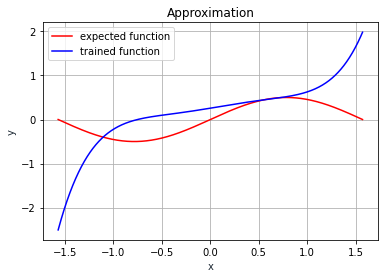

Iteration: 2000, loss:  8.1399564743042, loss_delta: 0.002979278564453125


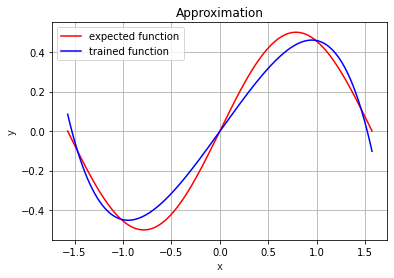

Iteration: 4000, loss:  5.968632698059082, loss_delta: 0.0005745887756347656


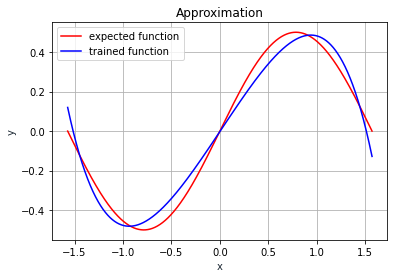

Iteration: 6000, loss:  4.948838233947754, loss_delta: 0.00046062469482421875


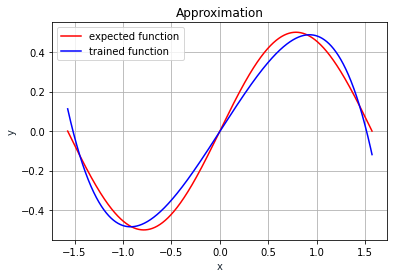

Iteration: 8000, loss:  4.10947322845459, loss_delta: 0.00038242340087890625


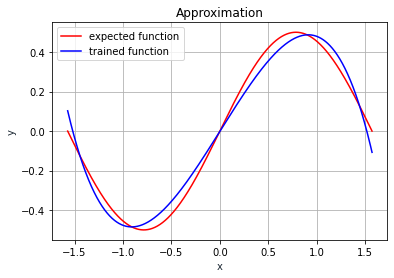

Iteration: 10000, loss:  3.4130613803863525, loss_delta: 0.00031638145446777344


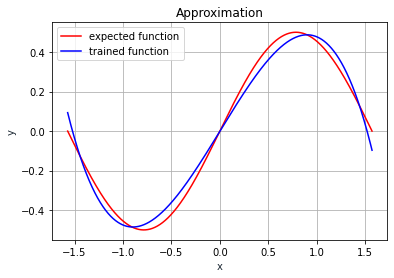

Iteration: 12000, loss:  2.835097312927246, loss_delta: 0.0002624988555908203


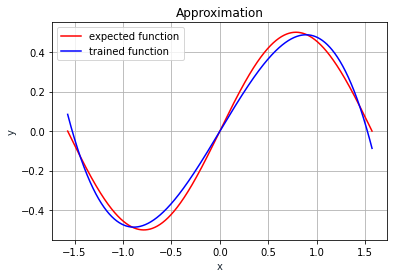

Iteration: 14000, loss:  2.355362892150879, loss_delta: 0.0002181529998779297


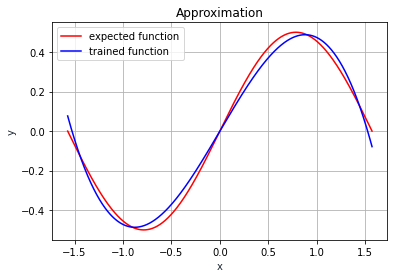

Iteration: 16000, loss:  1.957129716873169, loss_delta: 0.0001811981201171875


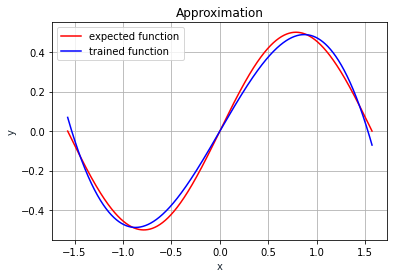

Iteration: 18000, loss:  1.6265289783477783, loss_delta: 0.00015020370483398438


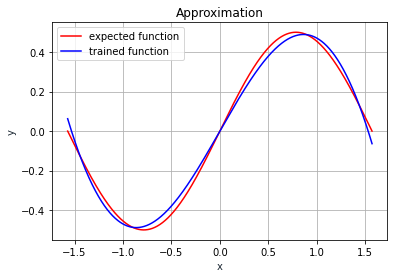

Iteration: 20000, loss:  1.3520658016204834, loss_delta: 0.0001246929168701172


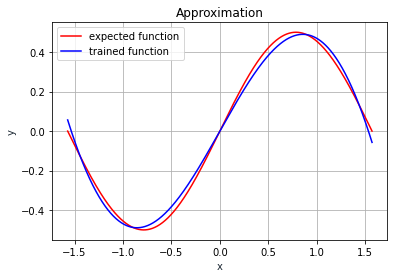

KeyboardInterrupt: ignored

In [14]:
training_graph_display_rate = 2000
stagnation_tolerance_rate = 0.00001
number_of_iterations = 100000
interval_length = math.pi
x_min = -math.pi/2
x_max = x_min + interval_length
x = torch.linspace(x_min, x_max, 2000, device=device, dtype=dtype)
y_expected = torch.cos(x)*torch.sin(x)
learning_rate = 1e-6
perform_approximation(x, y_expected, learning_rate, number_of_iterations, training_graph_display_rate, stagnation_tolerance_rate)